- Fonte: [https://projecteuler.net/problem=808](https://projecteuler.net/problem=808)

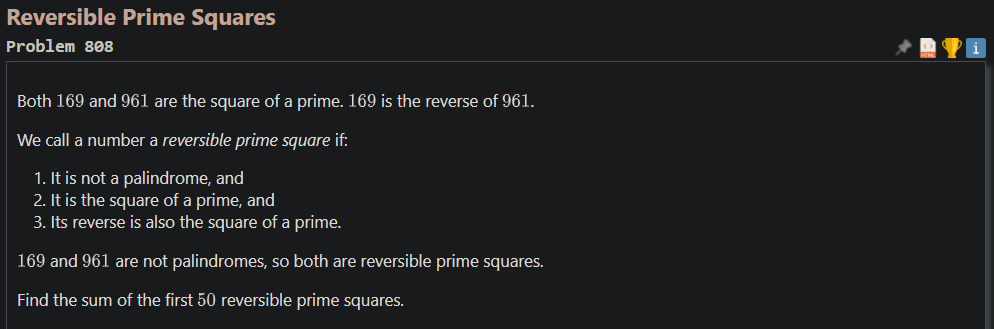

In [1]:
from math import sqrt
from time import time

In [2]:
def e_primo(n: int)->bool:
    c = 0
    for d in range(1, int(sqrt(n))+1):
        c += 1 if n % d == 0 else 0
    
    return c == 1

for k in range(3, 100, 2):
    if (e_primo(k)):
        print (k, end=', ')

3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97, 

In [3]:
def inverso(n: int)->int:
    ninv = 0
    while n > 0:
        resto = (n % 10)
        ninv = ninv*10 + resto
        n //= 10
    
    return ninv

print (inverso(987))
print (inverso(44))
print (inverso(123456))

789
44
654321


In [4]:
def e_palindromo(n: int)->bool:
    return n == inverso(n)

print (e_palindromo(989))
print (e_palindromo(354))
print (e_palindromo(1234554321))
print (e_palindromo(123454321))

True
False
True
True


In [5]:
def quadrado_de_um_primo(n: int)->bool:
    return sqrt(n) % 1 == 0 and e_primo(int(sqrt(n)))
    # return e_primo(n**2)

print (quadrado_de_um_primo(169))
print (quadrado_de_um_primo(961))
print (quadrado_de_um_primo(16))

True
True
False


---
# Criar primos eficientemente

In [ ]:
def crivo_eratostenes(n):
    """Função que cria números primos de forma muito eficiente. 
    Enquando usamos loop no python, que demora cerca de 1 min para cada milhão, esta forma consegue gerar até 100_000_000 (100 milhões) em 10 segundos.
    """
    crivo = [True] * (n + 1)    # primeiro consideramos que todos são números primos, porém trabalhamos com um vetor booleano
    
    crivo[0] = crivo[1] = False # 0 e 1 não são primos, por isso já descartamos logo
    
    for i in range(2, int(sqrt(n)) + 1): # não precisamos ir até n, vamos até sua raiz quadrada
        if crivo[i]:    # se o número ainda for primo, pelo menos retiramos todos os seus múltiplos daqui para frente
            crivo[i*i : n+1 : i] = [False] * len(crivo[i*i : n+1 : i]) # aqui está o segredo. retiramos a partir de i**2 e todos seus múltiplos, pois sabemos que estes números não terão somente 1 e ele mesmo como divisores.
            
    return [num for num, is_prime in enumerate(crivo) if is_prime] # retornamos uma lista com números agora, onde conseguimos pegar todas as posições dos booleanos como True, usando o enumerate

primos = crivo_eratostenes(100_000_000)

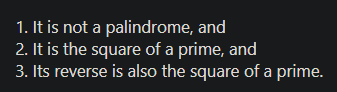

In [ ]:
raiz_dos_numeros = [] # esta lista aqui serve apenas para debug
numeros = [] # lista que vai coletar os números
k = 0

while len(list(set(numeros))) < 50: # enquanto a lista for menor que 50
    n = primos[k]
    n2 = n**2
    if not(e_palindromo(n2)) and quadrado_de_um_primo(n2) and quadrado_de_um_primo(inverso(n2)): # obedecendo às condições do problema

        if n2 not in numeros:
            raiz_dos_numeros.append(n)
            numeros.append(n2)

        if inverso(n2) not in numeros:                  # aqui está uma dica interessante. se o primeiro número atendeu aos requisitos, então seu inverso também atende e já podemos adicioná-lo à lista final
            raiz_dos_numeros.append(inverso(n))         # isso é feito porque se tivesse que rodar até o último número listado ia ser inviável. 
            numeros.append(inverso(n2))                 # Perceba que existe um padrão. Quando encontramos um número, logo após vem o seu inverso. 
                                                        # Isso nos dá uma dica que não precisamos ir até o fim se encontramos o seu primeiro par.
    k += 1

for n, n2 in zip(raiz_dos_numeros, numeros):
    print (n, n2, sep=' => ')

13 => 169
31 => 961
113 => 12769
311 => 96721
1021 => 1042441
1201 => 1442401
1031 => 1062961
1301 => 1692601
1103 => 1216609
3011 => 9066121
11003 => 121066009
30011 => 900660121
110221 => 12148668841
122011 => 14886684121
111211 => 12367886521
112111 => 12568876321
1000211 => 1000422044521
1120001 => 1254402240001
1001003 => 1002007006009
3001001 => 9006007002001
1010201 => 1020506060401
1020101 => 1040606050201
1100311 => 1210684296721
1130011 => 1276924860121
1101103 => 1212427816609
3011011 => 9066187242121
1101211 => 1212665666521
1121011 => 1256665662121
1102111 => 1214648656321
1112011 => 1236568464121
1111021 => 1234367662441
1201111 => 1442667634321
10002121 => 100042424498641
12120001 => 146894424240001
10011101 => 100222143232201
10111001 => 102232341222001
10012001 => 100240164024001
10021001 => 100420461042001
10020121 => 100402824854641
12102001 => 146458428204001
10100113 => 102012282612769
31100101 => 967216282210201
10100201 => 102014060240401
10200101 => 104042060410

In [17]:
sum(numeros)

3807504276997394